In [ ]:
# Ucitavanje biblioteka i funkcija
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# podešavanja ispisa
pd.set_option('display.float_format', lambda x: '%.2f' % x) # prikaz df na 2 decimale (npr. za describe)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv
Saving data_processed.csv to data_processed.csv


In [ ]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['data.csv']))
df = pd.read_csv(io.BytesIO(uploaded['data_processed.csv']))

In [ ]:
print(df.isnull().sum().sum())  #nedostajuci podaci i koliko ih je

0


In [ ]:
#izbacivanje jedinstvenih oznaka pacijenata i poslednje kolone tj labela
df1.drop(columns=df1.columns[0], axis=1, inplace=True)
df1 = df1.drop('y', axis=1)

In [ ]:
df1.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73


In [ ]:
#izracunavanje srednje vrednosti signala za svaki uzorak
df1=df1.iloc[:, 1:-1]
rowmeans = np.sum(df1, axis=1)/178
print(rowmeans)


0       -17.38
1        25.22
2       -43.66
3       -67.96
4        -6.19
         ...  
11495     5.55
11496     4.98
11497     6.72
11498   -38.93
11499    -2.39
Length: 11500, dtype: float64


In [ ]:
#dodavanje srednje vrednosti kao novu kolonu u drugu bazu
df['rowmeans'] = rowmeans

In [ ]:
#izracunavanje kvadratnog korena srednje kvadratne devijacije za svaki uzorak
rms = np.sqrt(np.mean(np.square(df1), axis=1))
print(rms)

0        97.14
1       474.36
2        62.64
3        70.51
4        39.09
         ...  
11495    38.63
11496   163.56
11497    44.91
11498    74.62
11499    49.73
Length: 11500, dtype: float64


In [ ]:
#dodavanje kvadratnog korena srednje kvadratne devijacije kao novu kolonu u drugoj bazi
df['rms'] = rms

In [ ]:
df.head()

,max,std,range,z_cros,label,rowmeans,rms
0,281,95.98,510,23,4,-17.38,97.14
1,1716,473.17,2229,8,1,25.22,474.36
2,126,44.31,206,12,5,-43.66,62.64
3,105,15.97,83,0,5,-67.96,70.51
4,103,38.80,181,30,5,-6.19,39.09


In [ ]:
#postavljanje labele na kraj
df = df.reindex(columns=["max", "std", "range", "z_cros", "rowmeans", "rms", "label"])

In [ ]:
df.head()

,max,std,range,z_cros,rowmeans,rms,label
0,281,95.98,510,23,-17.38,97.14,4
1,1716,473.17,2229,8,25.22,474.36,1
2,126,44.31,206,12,-43.66,62.64,5
3,105,15.97,83,0,-67.96,70.51,5
4,103,38.80,181,30,-6.19,39.09,5


In [ ]:
df.describe() #Analiza obeležja

,max,std,range,z_cros,rowmeans,rms,label
count,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00
mean,289.33,101.92,471.01,14.56,-7.59,108.87,3.00
std,356.05,125.62,577.35,7.47,32.52,123.67,1.41
min,30.00,10.71,49.00,0.00,-233.33,12.04,1.00
25%,108.00,36.55,172.00,9.00,-25.16,43.33,2.00
50%,151.00,51.05,243.00,14.00,-6.15,60.92,3.00
75%,252.00,90.31,422.25,20.00,10.04,98.46,4.00
max,2047.00,810.40,3696.00,50.00,245.99,809.01,5.00


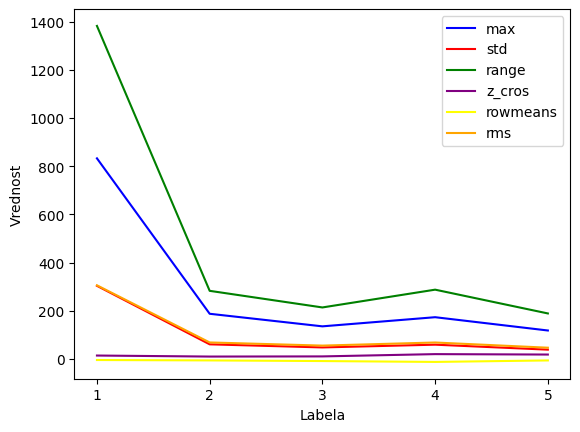

In [ ]:
#import matplotlib.pyplot as plt

# Pretvaranje labele u string
df['label'] = df['label'].astype(int).astype(str)

# Grupisanje po labeli i računanje proseka za svako obeležje
grouped_df = df.groupby('label').mean()

# Izvlačenje podataka za svako obeležje
max_vals = grouped_df['max']
std_vals = grouped_df['std']
range_vals = grouped_df['range']
z_cros_vals = grouped_df['z_cros']
rowmeans_vals = grouped_df['rowmeans']

rms_vals = grouped_df['rms']

# Prikazivanje podataka na jednom grafiku
plt.plot(max_vals, color='blue', label='max')
plt.plot(std_vals, color='red', label='std')
plt.plot(range_vals, color='green', label='range')
plt.plot(z_cros_vals, color='purple', label='z_cros')
plt.plot(rowmeans_vals, color='yellow', label='rowmeans')
plt.plot(rms_vals, color='orange', label='rms')


plt.xlabel('Labela')
plt.ylabel('Vrednost')
plt.legend()
plt.show()


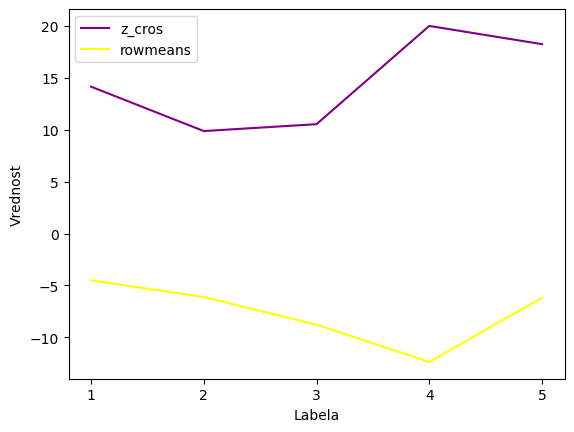

In [ ]:
#import matplotlib.pyplot as plt

# Pretvaranje labele u string
df['label'] = df['label'].astype(int).astype(str)

# Grupisanje po labeli i računanje proseka za svako obeležje
grouped_df = df.groupby('label').mean()

# Izvlačenje podataka za svako obeležje
z_cros_vals = grouped_df['z_cros']
rowmeans_vals = grouped_df['rowmeans']



plt.plot(z_cros_vals, color='purple', label='z_cros')
plt.plot(rowmeans_vals, color='yellow', label='rowmeans')



plt.xlabel('Labela')
plt.ylabel('Vrednost')
plt.legend()
plt.show()


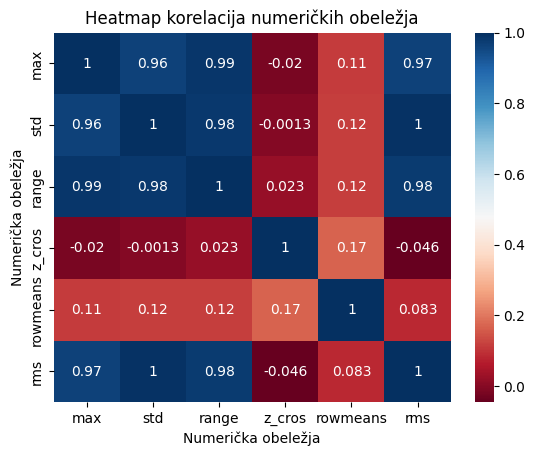

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# numerička obelezja koje analiziramo
num_cols = ['max', 'std', 'range', 'z_cros', 'rowmeans', 'rms']

# Izračunavanje korelacija između njih
corr_matrix = df[num_cols].corr()

# Kreiranje heatmap pomoću Seaborn biblioteke
sns.heatmap(corr_matrix, annot=True, cmap = 'RdBu')

# naslovi
plt.title('Heatmap korelacija numeričkih obeležja')
plt.xlabel('Numerička obeležja')
plt.ylabel('Numerička obeležja')

# prikaz
plt.show()


In [ ]:

X = df.iloc[:, :-1].copy()
y=df.iloc[:, -1].copy()
y = y.astype('int')

In [ ]:
# postavljanje vrednosti labela '1' u 1 i '2,3,4,5' u 0
y[y == 1] = 1
y[(y >= 2) & (y <= 5)] = 0
y = y.astype('int')

In [ ]:
# korelacija kao ispis
num_cols = ['max', 'std', 'range', 'z_cros', 'rowmeans', 'rms']

corr_matrix = df[num_cols].corr()

# Ispis
for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        corr = corr_matrix.iloc[i,j]
        print(f"Korelacija {num_cols[i]} i {num_cols[j]}: {corr:.3f}")

Korelacija max i std: 0.965
Korelacija max i range: 0.986
Korelacija max i z_cros: -0.020
Korelacija max i rowmeans: 0.111
Korelacija max i rms: 0.966
Korelacija std i range: 0.982
Korelacija std i z_cros: -0.001
Korelacija std i rowmeans: 0.117
Korelacija std i rms: 0.996
Korelacija range i z_cros: 0.023
Korelacija range i rowmeans: 0.117
Korelacija range i rms: 0.977
Korelacija z_cros i rowmeans: 0.167
Korelacija z_cros i rms: -0.046
Korelacija rowmeans i rms: 0.083


In [ ]:
def evaluation_classifier(conf_mat):

    TP = conf_mat[1, 1]
    TN = conf_mat[0, 0]
    FP = conf_mat[0, 1]
    FN = conf_mat[1, 0]
    precision = TP/(TP+FP)
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    F_score = 2*precision*sensitivity/(precision+sensitivity)


    print('precision: ', precision)
    print('accuracy: ', accuracy)
    print('sensitivity/recall: ', sensitivity)
    print('specificity: ', specificity)
    print('F score: ', F_score)

In [ ]:
#Podela uzoraka na tri podskupa (za obuku, validaciju i testiranje) tako da test i validacioni podskup sadrži 10% nasumično izabranih uzoraka iz baze
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:


#standardizacija numerickih obelezja
#scaler = StandardScaler()
#X[num_cols] = scaler.fit_transform(X[num_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y) #0.9 trening
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train) #10% na validaciju


LOGISTICKA REGRESIJA

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#lista u kojoj cuvamo odabrane vrednosti parametara
recall = []

In [ ]:
from sklearn.metrics import roc_curve

for num in [100,200,500,1000]:
  for solv in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:

# instancirati objekat klase LogisticRegression sa optimalnim parametrima max_iter i solver
    classifier = LogisticRegression(max_iter=num, solver = solv)

# obuciti model za trening podatke
    classifier.fit(X_train1, y_train1)

#izvrsiti predikciju nad validacionim vrednostima
    y_pred = classifier.predict(X_val)

#dodati  odabrane mere uspesnosti na kreiranu listu
    recall.append(recall_score(y_val, y_pred))

#ispisati vr parametara i reyultujucu odabranu meru uspesnosti i tacnost
    print('max_iter = {}, solver = {}, osetljivost = {}, tacnost = {}'.format(num, solv, recall_score(y_val, y_pred), accuracy_score(y_val, y_pred) ))

# odrediti verovatnoce pripadnosti klasama za uzorke validacionog skupa
    y_pred_prob = classifier.predict_proba(X_val)[:, 1]

max_iter = 100, solver = newton-cg, osetljivost = 0.8357487922705314, tacnost = 0.9594202898550724
max_iter = 100, solver = lbfgs, osetljivost = 0.8357487922705314, tacnost = 0.9594202898550724
max_iter = 100, solver = liblinear, osetljivost = 0.8357487922705314, tacnost = 0.9603864734299516


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter = 100, solver = sag, osetljivost = 0.8309178743961353, tacnost = 0.9304347826086956
max_iter = 100, solver = saga, osetljivost = 0.8260869565217391, tacnost = 0.927536231884058
max_iter = 200, solver = newton-cg, osetljivost = 0.8357487922705314, tacnost = 0.9594202898550724
max_iter = 200, solver = lbfgs, osetljivost = 0.8357487922705314, tacnost = 0.9594202898550724
max_iter = 200, solver = liblinear, osetljivost = 0.8357487922705314, tacnost = 0.9603864734299516


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter = 200, solver = sag, osetljivost = 0.8309178743961353, tacnost = 0.9314009661835749


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter = 200, solver = saga, osetljivost = 0.8309178743961353, tacnost = 0.9304347826086956
max_iter = 500, solver = newton-cg, osetljivost = 0.8357487922705314, tacnost = 0.9594202898550724
max_iter = 500, solver = lbfgs, osetljivost = 0.8357487922705314, tacnost = 0.9594202898550724
max_iter = 500, solver = liblinear, osetljivost = 0.8357487922705314, tacnost = 0.9603864734299516


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter = 500, solver = sag, osetljivost = 0.8405797101449275, tacnost = 0.9352657004830918


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter = 500, solver = saga, osetljivost = 0.8309178743961353, tacnost = 0.9314009661835749
max_iter = 1000, solver = newton-cg, osetljivost = 0.8357487922705314, tacnost = 0.9594202898550724
max_iter = 1000, solver = lbfgs, osetljivost = 0.8357487922705314, tacnost = 0.9594202898550724
max_iter = 1000, solver = liblinear, osetljivost = 0.8357487922705314, tacnost = 0.9603864734299516
max_iter = 1000, solver = sag, osetljivost = 0.8454106280193237, tacnost = 0.9352657004830918
max_iter = 1000, solver = saga, osetljivost = 0.8405797101449275, tacnost = 0.9352657004830918


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


ovaj model se trenira na X_train1 i y_train1 skupu (ne na X_train i y_train). Ovo je zato što X_train1 i y_train1 predstavljaju manji skup podataka koji se koristi za podešavanje hiperparametara, dok se konačni model trenira na celom trening skupu (X_train i y_train).

Nakon obuke modela na X_train1 i y_train1 skupu, vrši se predikcija na validacionom skupu (X_val) kako bi se procenila efikasnost modela za svaku kombinaciju parametara. Ovo se radi na validacionom skupu zato što se on koristi za evaluaciju i podešavanje hiperparametara, dok se test skup koristi samo za konačnu evaluaciju efikasnosti modela.

Nakon što se kreira model i proveri na validacionom skupu za sve kombinacije parametara, na kraju se testira konačni model na test skupu kako bi se dobila konačna ocena efikasnosti modela.

th:  [2.00000000e+00 1.00000000e+00 9.98393775e-01 9.98203239e-01
 9.79588381e-01 9.77823753e-01 9.72536967e-01 9.58510095e-01
 8.65044385e-01 8.59713068e-01 5.70446176e-01 5.61966900e-01
 5.45141495e-01 5.42989762e-01 5.27927865e-01 4.80172933e-01
 4.58991467e-01 4.49501023e-01 4.24127796e-01 4.23393336e-01
 4.08958876e-01 3.98878504e-01 3.72218032e-01 3.68966189e-01
 3.60422581e-01 3.58495222e-01 3.47918176e-01 3.39974726e-01
 3.20283531e-01 3.09228509e-01 2.97943512e-01 2.87490248e-01
 2.75053108e-01 2.68789219e-01 2.59055437e-01 2.36516384e-01
 2.33969698e-01 1.90725966e-01 1.83810411e-01 1.74024111e-01
 1.64631669e-01 1.53830328e-01 1.52355855e-01 1.29195507e-01
 1.28320905e-01 8.35549159e-02 8.03175828e-02 7.62845233e-02
 7.50472166e-02 6.78568519e-02 6.77196316e-02 6.43683318e-02
 6.35203976e-02 1.04378172e-02 1.03714768e-02 1.77233623e-04]
recall:  [0.         0.00483092 0.48309179 0.48309179 0.65217391 0.65217391
 0.6763285  0.6763285  0.74879227 0.74879227 0.81642512 0.816425

Text(0.5, 1.0, 'ROC curve')

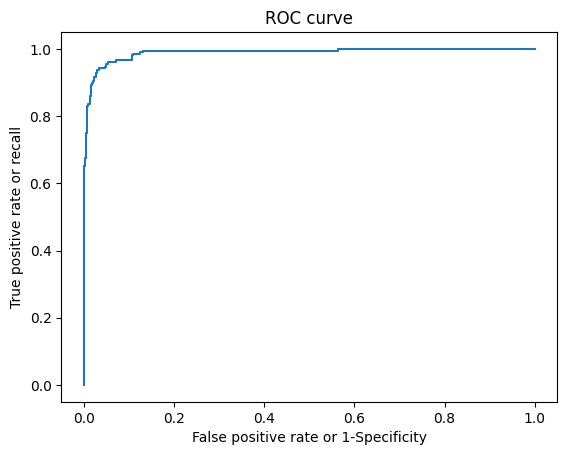

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

classifier = LogisticRegression(max_iter = 1000, solver = 'liblinear')
classifier.fit(X_train1, y_train1)
y_pred = classifier.predict(X_val)

y_pred_prob = classifier.predict_proba(X_val)[:,1]

# kreirati ROC krivu
fpr, tpr, threshold = roc_curve(y_val, y_pred_prob, pos_label=1)
print('th: ', threshold)
print('recall: ', tpr)
print('specificity: ', 1-fpr)

plt.plot(fpr, tpr)
plt.xlabel('False positive rate or 1-Specificity')
plt.ylabel('True positive rate or recall')
plt.title('ROC curve')



Ukratko, prvi kod se koristi za podešavanje hiperparametara i evaluaciju modela na validacionom skupu, dok se drugi kod koristi za evaluaciju performansi odabranog modela na validacionom skupu.

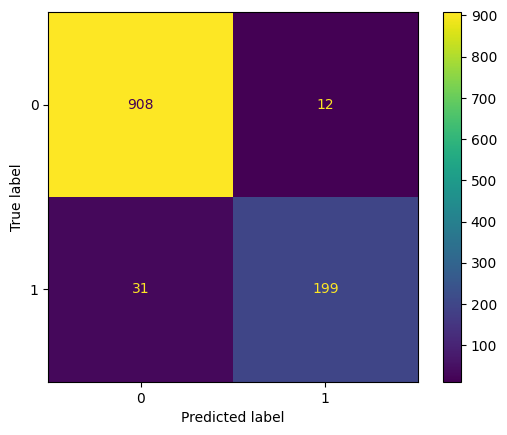

precision:  0.943127962085308
accuracy:  0.9626086956521739
sensitivity/recall:  0.8652173913043478
specificity:  0.9869565217391304
F score:  0.9024943310657596


In [ ]:
classifier = LogisticRegression(max_iter=1000, solver = 'liblinear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

conf_mat = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=classifier.classes_)
plt.show()

evaluation_classifier(conf_mat)

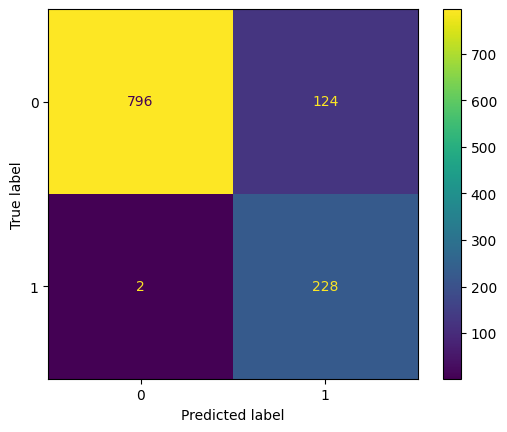

precision:  0.6477272727272727
accuracy:  0.8904347826086957
sensitivity/recall:  0.991304347826087
specificity:  0.8652173913043478
F score:  0.7835051546391754


In [ ]:
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

# odgovarajuci prag
y_pred = y_pred_prob >= threshold[-4]

conf_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=classifier.classes_)
#disp.plot(cmap="Blues")
plt.show()

evaluation_classifier(conf_mat)

In [ ]:
from sklearn.preprocessing import StandardScaler

# inicijalizacija standardizatora
scaler = StandardScaler()

# primena standardizacije samo na trening skupu
X_train_std = scaler.fit_transform(X_train)
X_train1_std = scaler.fit_transform(X_train1)


# primena standardizacije na validacioni i test skup koristeći isti standardizator
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)


Sens = 0.8260869565217391
Sens = 0.8526570048309179
Sens = 0.8140096618357487
Sens = 0.8502415458937198
Sens = 0.857487922705314
finalna matrica je: 
[[8168.  112.]
 [ 331. 1739.]]


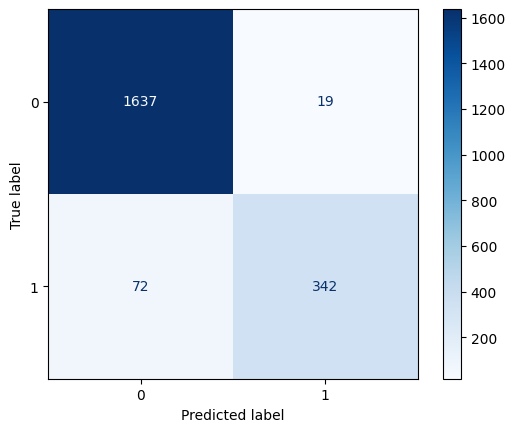

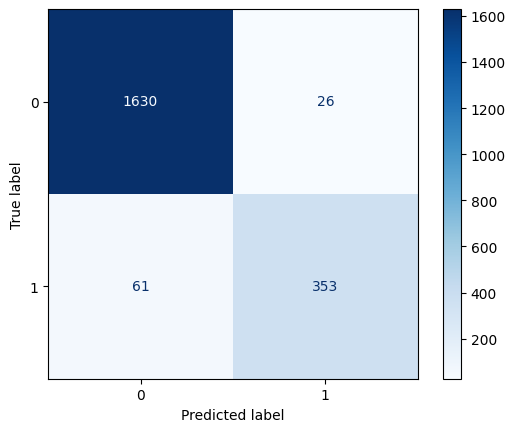

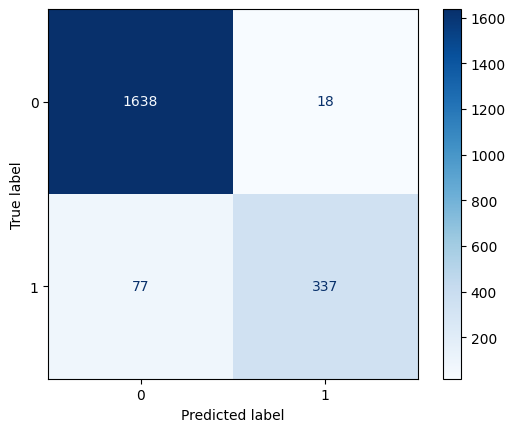

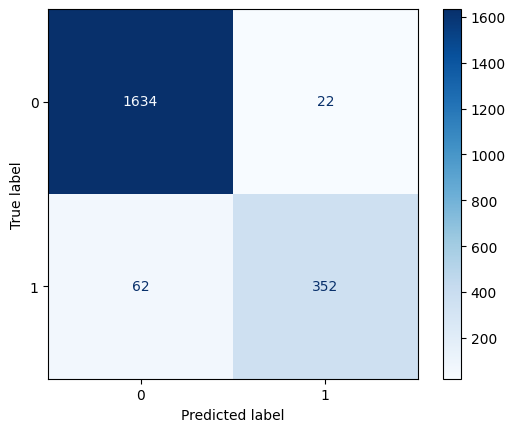

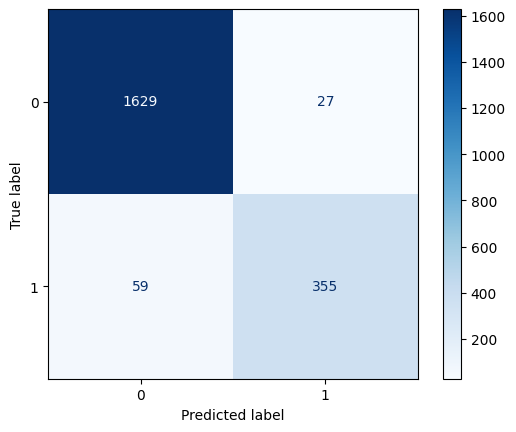

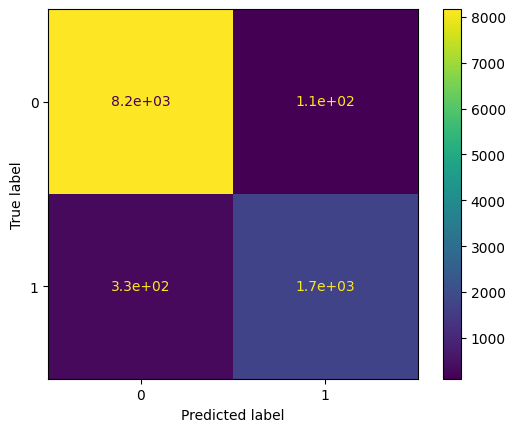

precision:  0.9394921663965424
accuracy:  0.9571980676328502
sensitivity/recall:  0.840096618357488
specificity:  0.9864734299516909
F score:  0.8870186176995664


In [ ]:
# cross validation logistic
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fin_conf_mat = np.zeros((len(np.unique(y)), len(np.unique(y))))

for train_index, test_index in kf.split(X_train_std, y_train):
  x_train = X_train.iloc[train_index, :]
  x_test = X_train.iloc[test_index, :]
  y_train_cv = y_train.iloc[train_index]
  y_test_cv = y_train.iloc[test_index]




  classifier = LogisticRegression(max_iter=1000, solver = 'liblinear')
  classifier.fit(x_train, y_train_cv)
  y_pred = classifier.predict(x_test)
  # matrica konfuzije i finalna matrica konf
  conf_mat = confusion_matrix(y_test_cv, y_pred, labels=classifier.classes_)
  disp = ConfusionMatrixDisplay.from_predictions(y_true=y_test_cv, y_pred=y_pred, labels=classifier.classes_, cmap=plt.cm.Blues)

  print("Sens = {}".format(recall_score(y_test_cv, y_pred)))
  fin_conf_mat += conf_mat

print('finalna matrica je: ')
print(fin_conf_mat)
disp = ConfusionMatrixDisplay(confusion_matrix=fin_conf_mat, display_labels=classifier.classes_)
disp.plot()
plt.show()
evaluation_classifier(fin_conf_mat)



In [ ]:
from sklearn.metrics import roc_curve

for num in [100,200,500,1000]:
  for solv in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:

# instancirati objekat klase LogisticRegression sa optimalnim parametrima max_iter i solver
    classifier = LogisticRegression(max_iter=num, solver = solv)

# obuciti model za trening podatke
    classifier.fit(X_train1_std, y_train1)

#izvrsiti predikciju nad validacionim vrednostima
    y_pred = classifier.predict(X_val_std)

#dodati  odabrane mere uspesnosti na kreiranu listu
    recall.append(recall_score(y_val, y_pred))

#ispisati vr parametara i reyultujucu odabranu meru uspesnosti i tacnost
    print('max_iter = {}, solver = {}, osetljivost = {}, tacnost = {}'.format(num, solv, recall_score(y_val, y_pred), accuracy_score(y_val, y_pred) ))

# odrediti verovatnoce pripadnosti klasama za uzorke validacionog skupa
    y_pred_prob = classifier.predict_proba(X_val_std)[:, 1]

max_iter = 100, solver = newton-cg, osetljivost = 0.8260869565217391, tacnost = 0.957487922705314
max_iter = 100, solver = lbfgs, osetljivost = 0.8260869565217391, tacnost = 0.957487922705314
max_iter = 100, solver = liblinear, osetljivost = 0.8260869565217391, tacnost = 0.957487922705314
max_iter = 100, solver = sag, osetljivost = 0.8260869565217391, tacnost = 0.957487922705314
max_iter = 100, solver = saga, osetljivost = 0.8260869565217391, tacnost = 0.957487922705314


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter = 200, solver = newton-cg, osetljivost = 0.8260869565217391, tacnost = 0.957487922705314
max_iter = 200, solver = lbfgs, osetljivost = 0.8260869565217391, tacnost = 0.957487922705314
max_iter = 200, solver = liblinear, osetljivost = 0.8260869565217391, tacnost = 0.957487922705314
max_iter = 200, solver = sag, osetljivost = 0.8260869565217391, tacnost = 0.957487922705314
max_iter = 200, solver = saga, osetljivost = 0.8260869565217391, tacnost = 0.957487922705314
max_iter = 500, solver = newton-cg, osetljivost = 0.8260869565217391, tacnost = 0.957487922705314
max_iter = 500, solver = lbfgs, osetljivost = 0.8260869565217391, tacnost = 0.957487922705314
max_iter = 500, solver = liblinear, osetljivost = 0.8260869565217391, tacnost = 0.957487922705314
max_iter = 500, solver = sag, osetljivost = 0.8260869565217391, tacnost = 0.957487922705314
max_iter = 500, solver = saga, osetljivost = 0.8260869565217391, tacnost = 0.957487922705314
max_iter = 1000, solver = newton-cg, osetljivost =

th:  [2.00000000e+00 1.00000000e+00 9.98802963e-01 9.98800224e-01
 9.82929786e-01 9.81792372e-01 9.34756749e-01 9.34222103e-01
 9.30837189e-01 9.30149411e-01 8.73526273e-01 8.56051366e-01
 6.08340933e-01 5.96045348e-01 5.21523188e-01 5.12471015e-01
 4.88177974e-01 4.55088562e-01 4.42045950e-01 4.41768432e-01
 4.28629738e-01 4.24849470e-01 3.69158011e-01 3.61275154e-01
 3.59175233e-01 3.29998406e-01 3.29028603e-01 3.14004571e-01
 3.13059668e-01 3.04495859e-01 2.98451905e-01 2.92945964e-01
 2.90166431e-01 2.89525601e-01 2.83325980e-01 2.68126496e-01
 2.66460275e-01 2.56956363e-01 2.55023052e-01 2.35507921e-01
 2.29085611e-01 2.23406187e-01 2.21248535e-01 2.19645530e-01
 1.98943495e-01 1.78194545e-01 1.76000261e-01 1.73679236e-01
 1.71488106e-01 1.58047968e-01 1.57483096e-01 1.46844216e-01
 1.40087914e-01 1.26784719e-01 1.23932393e-01 1.05096384e-01
 1.04081317e-01 8.94265178e-02 8.56723102e-02 2.30543872e-02
 2.30426906e-02 1.19108801e-03]
recall:  [0.         0.00483092 0.43478261 0.434

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, 'ROC curve')

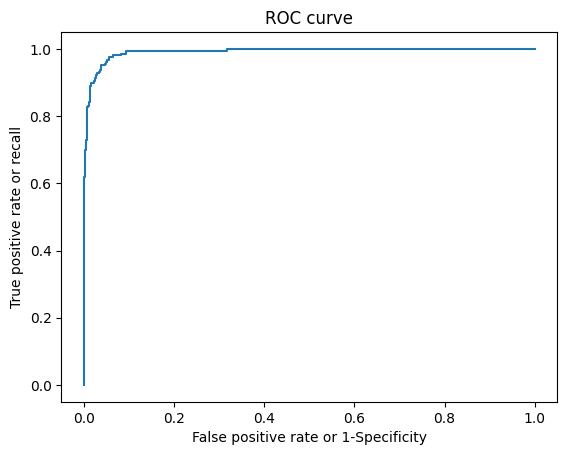

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

classifier = LogisticRegression(max_iter = 1000, solver = 'liblinear')
classifier.fit(X_train1_std, y_train1)
y_pred = classifier.predict(X_val)

y_pred_prob = classifier.predict_proba(X_val_std)[:,1]

# kreirati ROC krivu
fpr, tpr, threshold = roc_curve(y_val, y_pred_prob, pos_label=1)
print('th: ', threshold)
print('recall: ', tpr)
print('specificity: ', 1-fpr)

plt.plot(fpr, tpr)
plt.xlabel('False positive rate or 1-Specificity')
plt.ylabel('True positive rate or recall')
plt.title('ROC curve')



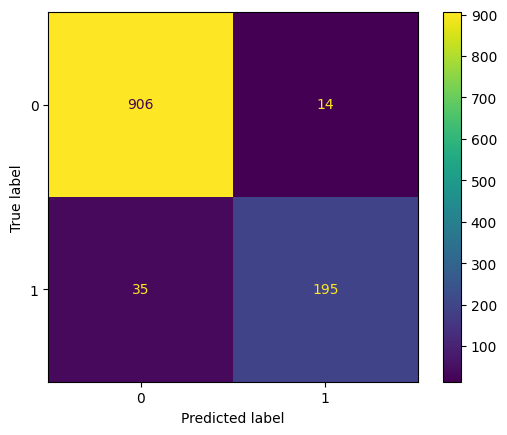

precision:  0.9330143540669856
accuracy:  0.957391304347826
sensitivity/recall:  0.8478260869565217
specificity:  0.9847826086956522
F score:  0.8883826879271071


In [ ]:
classifier = LogisticRegression(max_iter=1000, solver = 'liblinear')
classifier.fit(X_train_std, y_train)

y_pred = classifier.predict(X_test_std)

conf_mat = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=classifier.classes_)
plt.show()

evaluation_classifier(conf_mat)

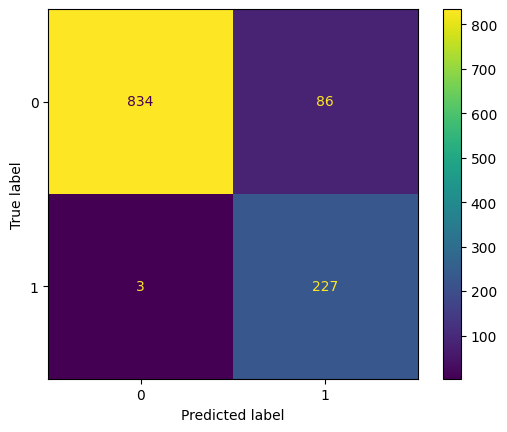

precision:  0.7252396166134185
accuracy:  0.922608695652174
sensitivity/recall:  0.9869565217391304
specificity:  0.9065217391304348
F score:  0.8360957642725597


In [ ]:
y_pred_prob = classifier.predict_proba(X_test_std)[:, 1]

# odgovarajuci prag
y_pred = y_pred_prob >= threshold[-4]

conf_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=classifier.classes_)
#disp.plot(cmap="Blues")
plt.show()

evaluation_classifier(conf_mat)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
import sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

lab_y=y.unique()

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

# inicijalizacija standardizatora
scaler = StandardScaler()

# primena standardizacije samo na trening skupu
x_train2_std = scaler.fit_transform(x_train2)

# primena standardizacije test skup koristeći isti standardizator
x_test2_std = scaler.transform(x_test2)


Sens = 0.9156010230179028
Sens = 0.9156010230179028
Sens = 0.948849104859335
Sens = 0.9156010230179028
Sens = 0.907928388746803
finalna matrica je: 
[[7636.  184.]
 [ 155. 1800.]]


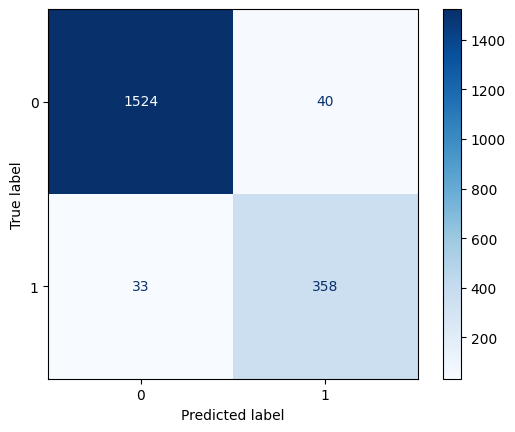

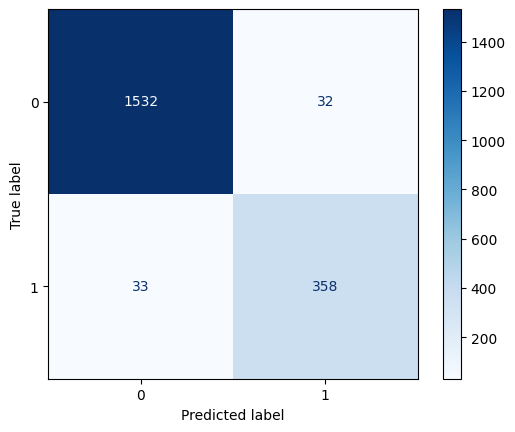

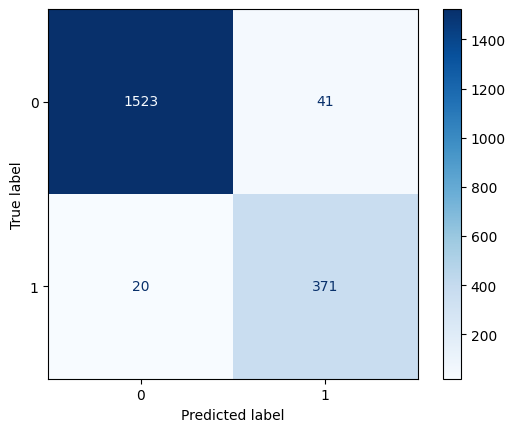

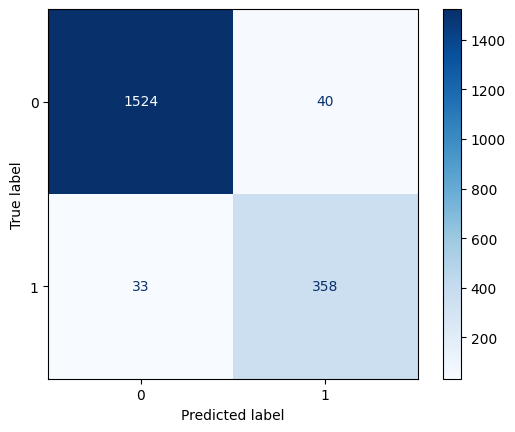

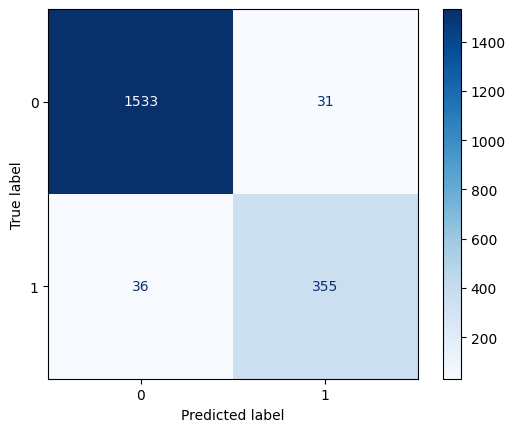

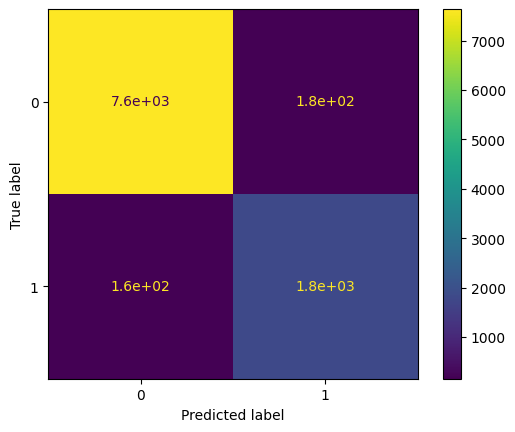

precision:  0.907258064516129
accuracy:  0.9653196930946292
sensitivity/recall:  0.9207161125319693
specificity:  0.9764705882352941
F score:  0.913937547600914


In [ ]:
# cross validation knn
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fin_conf_mat = np.zeros((len(np.unique(y)), len(np.unique(y))))

for train_index, test_index in kf.split(x_train2_std, y_train2):
  x_train = x_train2.iloc[train_index, :]
  x_test = x_train2.iloc[test_index, :]
  y_train_cv = y_train2.iloc[train_index]
  y_test_cv = y_train2.iloc[test_index]

  classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
  classifier.fit(x_train, y_train_cv)
  y_pred = classifier.predict(x_test)
  # matrica konfuzije i finalna matrica konf
  conf_mat = confusion_matrix(y_test_cv, y_pred, labels=classifier.classes_)
  disp = ConfusionMatrixDisplay.from_predictions(y_true=y_test_cv, y_pred=y_pred, labels=classifier.classes_, cmap=plt.cm.Blues)

  print("Sens = {}".format(recall_score(y_test_cv, y_pred)))
  fin_conf_mat += conf_mat

print('finalna matrica je: ')
print(fin_conf_mat)
disp = ConfusionMatrixDisplay(confusion_matrix=fin_conf_mat, display_labels=classifier.classes_)
disp.plot()
plt.show()
evaluation_classifier(fin_conf_mat)



[[811  17]
 [ 17 190]]
[[820   8]
 [ 26 181]]
[[814  14]
 [ 15 192]]
[[816  12]
 [ 16 191]]
[[813  15]
 [ 13 194]]
[[815  13]
 [ 15 192]]
[[812  16]
 [  9 198]]
[[815  13]
 [ 14 193]]
[[813  15]
 [ 11 196]]
[[810  18]
 [ 15 192]]
[[818  10]
 [ 25 182]]
[[810  18]
 [ 14 193]]
[[816  12]
 [ 19 188]]
[[810  18]
 [ 12 195]]
[[816  12]
 [ 15 192]]
[[812  16]
 [ 11 196]]
[[815  13]
 [ 15 192]]
[[812  16]
 [ 10 197]]


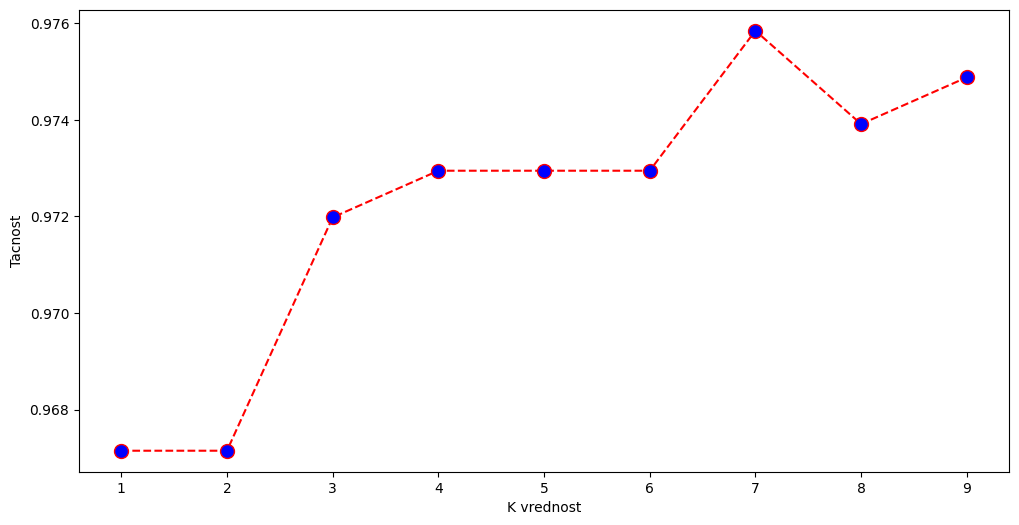

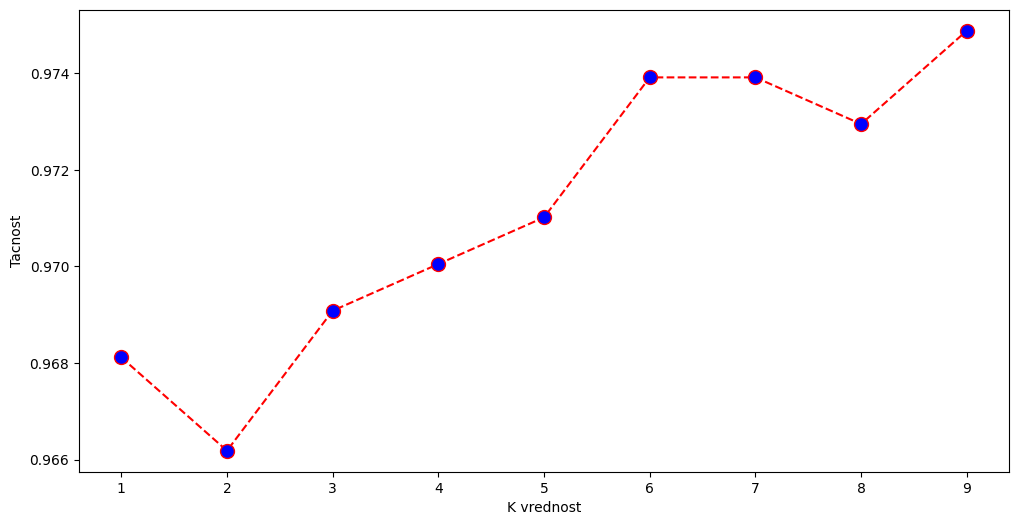

In [ ]:
for m in ['manhattan', 'euclidean']:
    acc = []
    for i in range(1, 10):
      classifier = KNeighborsClassifier(n_neighbors=i, metric = m)
      classifier.fit(X_train1_std, y_train1)
      y_pred=classifier.predict(X_val_std)
      c = confusion_matrix(y_val, y_pred)
      print(c)
      acc.append(accuracy_score(y_val, y_pred))
    plt.figure(figsize=(12,6))
    plt.plot(range(1,10), acc, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
    plt.xlabel('K vrednost')
    plt.ylabel('Tacnost')


[[903  17]
 [ 12 218]]


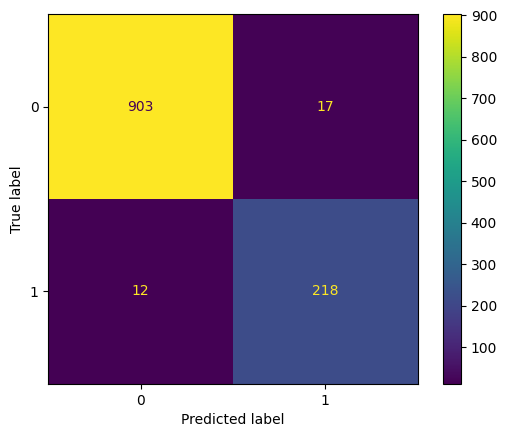

precision:  0.9276595744680851
accuracy:  0.9747826086956521
sensitivity/recall:  0.9478260869565217
specificity:  0.9815217391304348
F score:  0.9376344086021504


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#obuka finalnog modela
knn=KNeighborsClassifier(n_neighbors=7, metric = 'manhattan')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
conf_mat = confusion_matrix(y_test, y_pred)

print(conf_mat)
disp= ConfusionMatrixDisplay.from_predictions(y_true= y_test,  y_pred=y_pred,  labels = knn.classes_)
plt.show()
evaluation_classifier(conf_mat)




[[807  21]
 [ 10 197]]
[[817  11]
 [ 23 184]]
[[813  15]
 [  9 198]]
[[816  12]
 [ 17 190]]
[[812  16]
 [ 12 195]]
[[813  15]
 [ 17 190]]
[[813  15]
 [ 12 195]]
[[814  14]
 [ 17 190]]
[[809  19]
 [ 14 193]]
[[809  19]
 [ 14 193]]
[[819   9]
 [ 25 182]]
[[811  17]
 [ 10 197]]
[[816  12]
 [ 18 189]]
[[814  14]
 [ 14 193]]
[[817  11]
 [ 19 188]]
[[813  15]
 [ 15 192]]
[[814  14]
 [ 17 190]]
[[812  16]
 [ 16 191]]


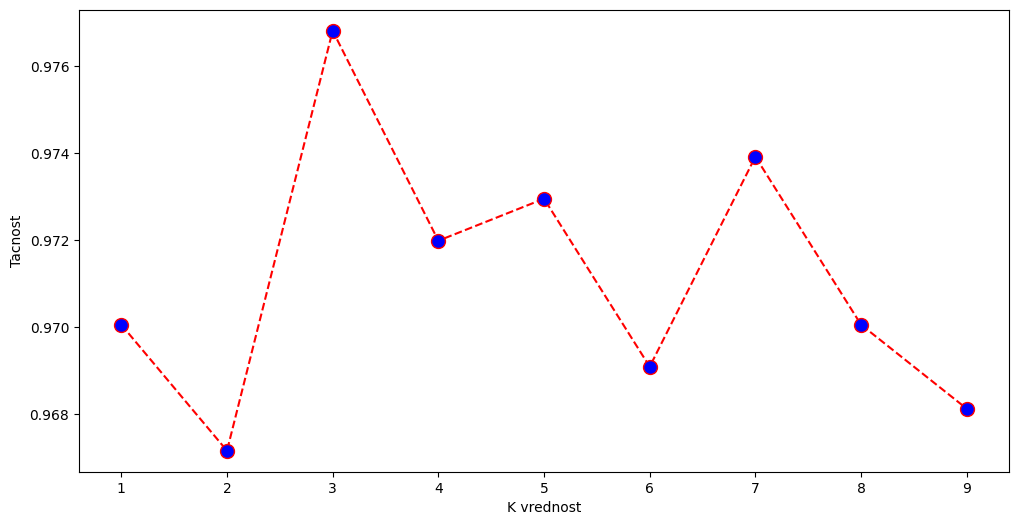

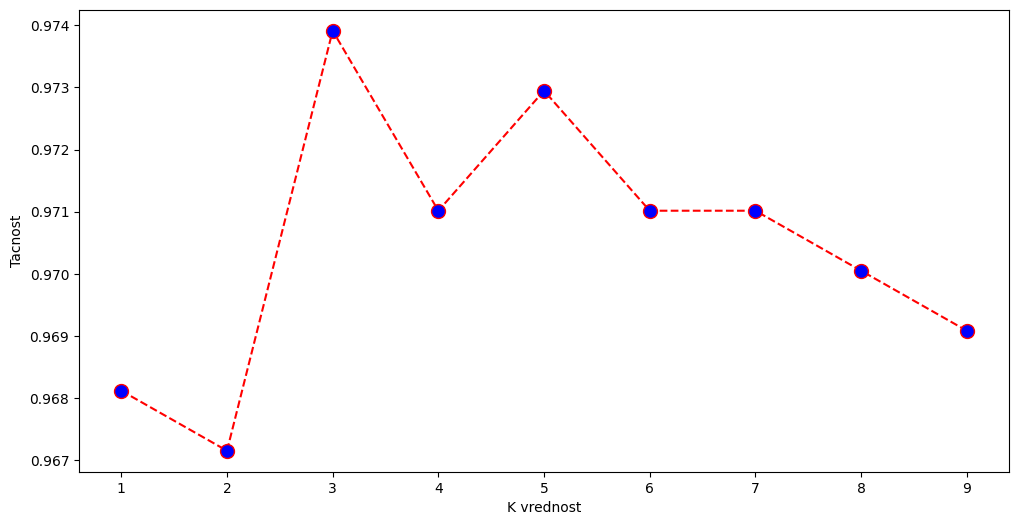

In [ ]:
for m in ['manhattan', 'euclidean']:
    acc = []
    for i in range(1, 10):
      classifier = KNeighborsClassifier(n_neighbors=i, metric = m)
      classifier.fit(X_train1, y_train1)
      y_pred=classifier.predict(X_val)
      c = confusion_matrix(y_val, y_pred)
      print(c)
      acc.append(accuracy_score(y_val, y_pred))
    plt.figure(figsize=(12,6))
    plt.plot(range(1,10), acc, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
    plt.xlabel('K vrednost')
    plt.ylabel('Tacnost')


[[903  17]
 [  9 221]]


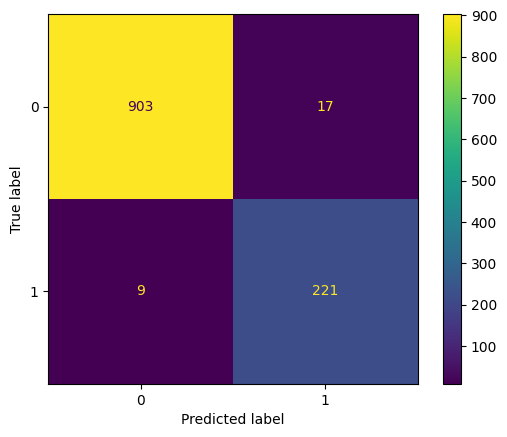

precision:  0.9285714285714286
accuracy:  0.9773913043478261
sensitivity/recall:  0.9608695652173913
specificity:  0.9815217391304348
F score:  0.9444444444444444


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#obuka finalnog modela
knn=KNeighborsClassifier(n_neighbors=3, metric = 'manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

print(conf_mat)
disp= ConfusionMatrixDisplay.from_predictions(y_true= y_test,  y_pred=y_pred,  labels = knn.classes_)
plt.show()
evaluation_classifier(conf_mat)




SVM

In [ ]:
from sklearn.svm import SVC

svm_recall=[]

for c in [1, 10 ,100]:
    for k in ['linear', 'rbf']:

# instancirati objekat klase LogisticRegression sa optimalnim parametrima max_iter i solver
      classifier = SVC(C=c, kernel=k, decision_function_shape='ovo')

# obuciti model za trening podatke
      classifier.fit(X_train1, y_train1)

#izvrsiti predikciju nad validacionim vrednostima
      y_pred = classifier.predict(X_val)

#dodati  odabrane mere uspesnosti na kreiranu listu
      svm_recall.append(recall_score(y_val, y_pred))

#ispisati vr parametara i reyultujucu odabranu meru uspesnosti i tacnost
      print('c = {}, k={}, osetljivost = {}, tacnost = {}'.format(c, k, recall_score(y_val, y_pred), accuracy_score(y_val, y_pred) ))

# odrediti verovatnoce pripadnosti klasama za uzorke validacionog skupa
    #y_pred_prob = classifier.predict_proba(X_val)[:, 1]

c = 1, k=linear, osetljivost = 0.855072463768116, tacnost = 0.957487922705314
c = 1, k=rbf, osetljivost = 0.9082125603864735, tacnost = 0.9584541062801932
c = 10, k=linear, osetljivost = 0.9130434782608695, tacnost = 0.9623188405797102
c = 10, k=rbf, osetljivost = 0.9178743961352657, tacnost = 0.966183574879227
c = 100, k=linear, osetljivost = 0.9178743961352657, tacnost = 0.9632850241545894
c = 100, k=rbf, osetljivost = 0.927536231884058, tacnost = 0.970048309178744


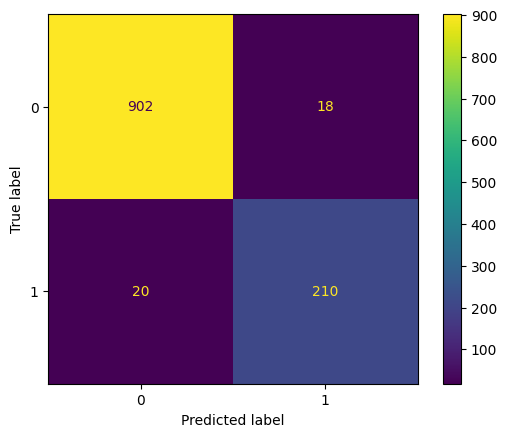

precision:  0.9210526315789473
accuracy:  0.9669565217391304
sensitivity/recall:  0.9130434782608695
specificity:  0.9804347826086957
F score:  0.9170305676855894


In [ ]:
classifier=SVC(C=100, kernel='rbf', decision_function_shape="ovo")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

conf_mat = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=classifier.classes_)
plt.show()

evaluation_classifier(conf_mat)

In [ ]:
from sklearn.svm import SVC

svm_recall=[]

for c in [1, 10 ,100]:
    for k in ['linear', 'rbf']:

# instancirati objekat klase LogisticRegression sa optimalnim parametrima max_iter i solver
      classifier = SVC(C=c, kernel=k, decision_function_shape='ovo')

# obuciti model za trening podatke
      classifier.fit(X_train1_std, y_train1)

#izvrsiti predikciju nad validacionim vrednostima
      y_pred = classifier.predict(X_val_std)

#dodati  odabrane mere uspesnosti na kreiranu listu
      svm_recall.append(recall_score(y_val, y_pred))

#ispisati vr parametara i reyultujucu odabranu meru uspesnosti i tacnost
      print('c = {}, k={}, osetljivost = {}, tacnost = {}'.format(c, k, recall_score(y_val, y_pred), accuracy_score(y_val, y_pred) ))

# odrediti verovatnoce pripadnosti klasama za uzorke validacionog skupa
    #y_pred_prob = classifier.predict_proba(X_val)[:, 1]

c = 1, k=linear, osetljivost = 0.8405797101449275, tacnost = 0.9594202898550724
c = 1, k=rbf, osetljivost = 0.9323671497584541, tacnost = 0.9739130434782609
c = 10, k=linear, osetljivost = 0.8454106280193237, tacnost = 0.9603864734299516
c = 10, k=rbf, osetljivost = 0.9323671497584541, tacnost = 0.9729468599033816
c = 100, k=linear, osetljivost = 0.8454106280193237, tacnost = 0.9603864734299516
c = 100, k=rbf, osetljivost = 0.9516908212560387, tacnost = 0.978743961352657


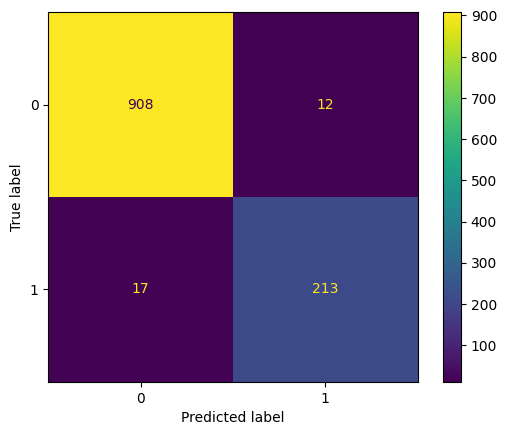

precision:  0.9466666666666667
accuracy:  0.9747826086956521
sensitivity/recall:  0.9260869565217391
specificity:  0.9869565217391304
F score:  0.9362637362637363


In [ ]:
classifier=SVC(C=100, kernel='rbf', decision_function_shape="ovo")
classifier.fit(X_train_std, y_train)
y_pred = classifier.predict(X_test_std)

conf_mat = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=classifier.classes_)
plt.show()

evaluation_classifier(conf_mat)

Sens = 0.9178743961352657
Sens = 0.9227053140096618
Sens = 0.9057971014492754
Sens = 0.9251207729468599
Sens = 0.9130434782608695
finalna matrica je: 
[[8113.  167.]
 [ 172. 1898.]]


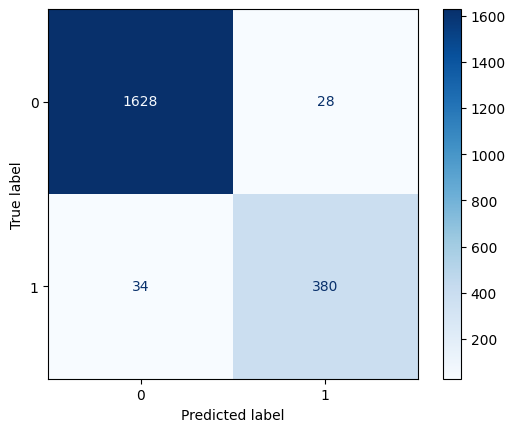

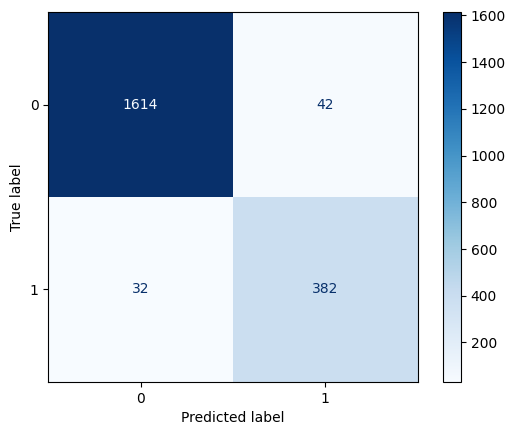

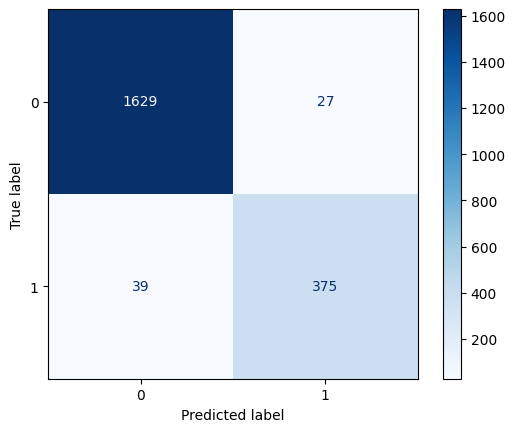

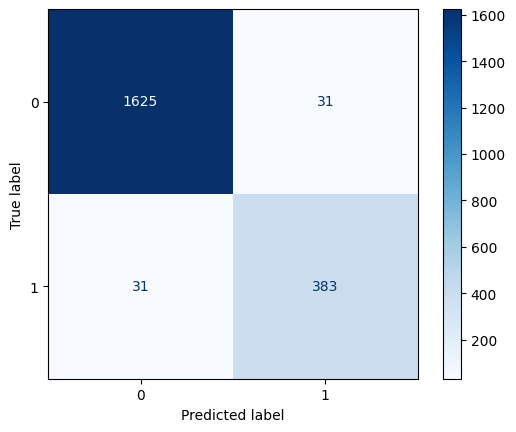

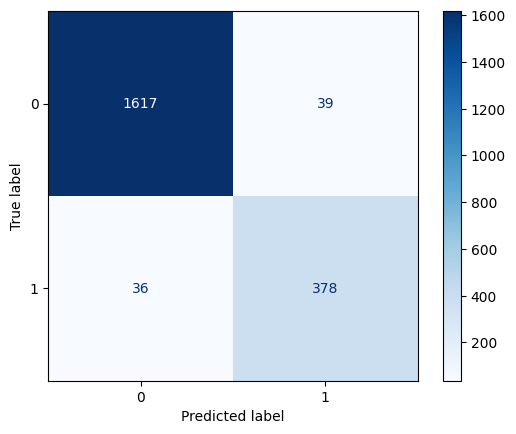

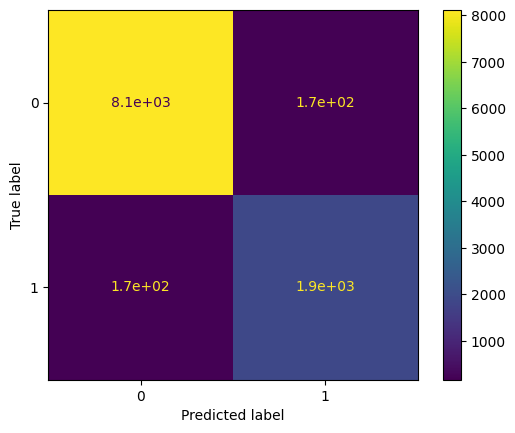

precision:  0.9191283292978208
accuracy:  0.9672463768115942
sensitivity/recall:  0.9169082125603865
specificity:  0.9798309178743961
F score:  0.9180169286577993


In [ ]:
# cross validation svc
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fin_conf_mat = np.zeros((len(np.unique(y)), len(np.unique(y))))

for train_index, test_index in kf.split(X_train_std, y_train):
  x_train = X_train.iloc[train_index, :]
  x_test = X_train.iloc[test_index, :]
  y_train_cv = y_train.iloc[train_index]
  y_test_cv = y_train.iloc[test_index]

  classifier = SVC(C=100, kernel='rbf', decision_function_shape="ovo")
  classifier.fit(x_train, y_train_cv)
  y_pred = classifier.predict(x_test)
  # matrica konfuzije i finalna matrica konf
  conf_mat = confusion_matrix(y_test_cv, y_pred, labels=classifier.classes_)
  disp = ConfusionMatrixDisplay.from_predictions(y_true=y_test_cv, y_pred=y_pred, labels=classifier.classes_, cmap=plt.cm.Blues)

  print("Sens = {}".format(recall_score(y_test_cv, y_pred)))
  fin_conf_mat += conf_mat

print('finalna matrica je: ')
print(fin_conf_mat)
disp = ConfusionMatrixDisplay(confusion_matrix=fin_conf_mat, display_labels=classifier.classes_)
disp.plot()
plt.show()
evaluation_classifier(fin_conf_mat)



In [ ]:
data = pd.read_csv('data_processed.csv')

In [ ]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

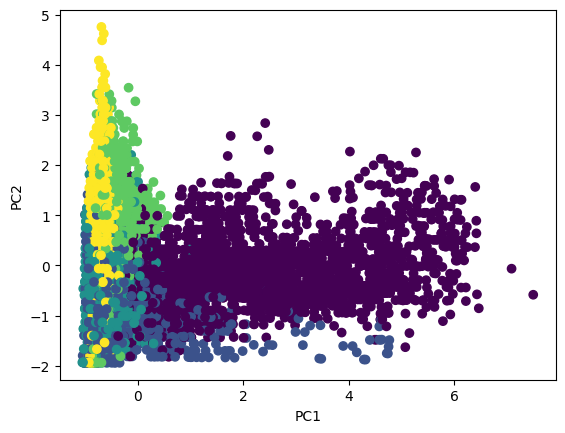

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
import numpy as np
from sklearn.decomposition import PCA


# Create a PCA object with the number of components you want to keep
pca = PCA(n_components=2)

# Fit the PCA model to your data
pca.fit(X)

# Transform your data using the PCA model
transformed_data = pca.transform(X)

# Print the shape of the transformed data (should be (11500, 2) if n_components=2)
print(transformed_data.shape)

(11500, 2)
